<a href="https://colab.research.google.com/github/MSoumen/Practice-With-TensorFlow/blob/master/Fashion_MNIST_My_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

# Importing Data

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Size of Train_images:',train_images.shape)
print('Size of Test_images:',test_images.shape)
print('Size of Train_labels:',train_labels.shape)
print('Size of Test_labels:',test_labels.shape)

Size of Train_images: (60000, 28, 28)
Size of Test_images: (10000, 28, 28)
Size of Train_labels: (60000,)
Size of Test_labels: (10000,)


# Visualize Data

In [0]:
import matplotlib.pyplot as plt
import matplotlib

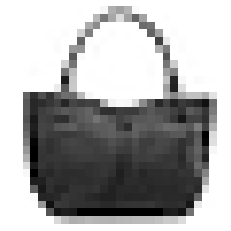

Category = 8


In [14]:
idx=100
plt.imshow(train_images[idx], cmap='Greys')
plt.axis('off')
plt.show()
print('Category =', train_labels[idx])

# Normalizing Data
Here the greyscale values is in between 0-255. So, values are in high diffrence from each others. We have to make this data in between 0-1 for feeding the NN.
One way is to do that is divide each items with 255. This is called Normalizing.

In [0]:
train_data = train_images / 255.0
test_data = test_images / 255.0

# Defining Model

In [0]:
model = keras.models.Sequential([keras.layers.Flatten(),  #sequential defines a sequence, Flatten() makes the multi-dim data into 1 dim   #input layer
                                 keras.layers.Dense(128, activation= tf.nn.relu),     # Dense() adds layer in NN    # Hidden layer
                                 keras.layers.Dense(10, activation=tf.nn.softmax)])   # softmax takes a list and picks the biggest    # output layer

In [0]:
# Compile the model to find Losss and optimize itto get optimized weights and biases
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy')

In [26]:
# Fitting the data
model.fit(train_data, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3792
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3396
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3140
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2691
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2399
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2291
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2226
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2174
E

### Observations: 
 - Loss = 0.1762
 - Accuracy = 0.8238 or 82%

In [28]:
# Evaluate on test set
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3833


0.3833487629890442

### Observations:
 - Loss = 0.3833 or 38%
 - Accuracy = 62%

# CallBack
It is a class which controls the traning by continously checking loss with a given value.

In [0]:
class callBack(tf.keras.callbacks.Callback):
  def when_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):      # when loss less than 30%
      print('\nLoss is low, cancelling traning !')
      self.model.stop_training = True

In [30]:
callBacks = callBack()
model.fit(train_data, train_labels, epochs=5, callbacks=[callBacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1717
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1656
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1619
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1600
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1555
